# Trabalho 1° de Mineração de Dados

## Movies on Netflix, Prime Video, Hulu and Disney+
### A collection of movies found on these streaming platforms


### Alunos

**Nome: Natanael Moreira de lemos - Matricula: 398447**  
**Nome: Ramiro Campos de Castro - Matricula: 400723**

## Perguntas Sobre o dataset

* Média de idade por cada plataforma ou por filme
* Média Imdb por país ou plataforma
* Média do Rotten Tomatoes
* Classificação de idade dos filmes em cada plataforma
* Diretor com mais filmes em cada plataforma
* Linguagem dos filmes
* Filmes com maior duração ou menor duração
* Qual plataforma tem mais séries ou filmes
* Gênero de filme mais popular
* Qual pais tem mais locação de filmes
* Qual plataforma possui mais disponibilidade de filmes 
* Ou Qual plataforma tem mais filmes 





In [74]:
import numpy as np
import pandas as pd
import seaborn as sns

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline

In [362]:
data = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")
dataS = pd.read_csv("tv_shows.csv")

In [363]:
data.head(5)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [364]:
dataS.head(5)

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [365]:
data.describe()

,Unnamed: 0,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8371.500000,8372.500000,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,4833.720789,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,0.000000,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4185.750000,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8371.500000,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12557.250000,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16743.000000,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


In [366]:
#Valores nulos

data.isnull().sum()

Unnamed: 0             0
ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

In [367]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16145 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

In [368]:
## Limpeza na coluna de idade

for i in range(len(data['Age'])):
    aux = data.loc[i,'Age']
    if aux != np.nan or aux != 'all' or aux != '':
        aux = str(aux)
        if '+' in aux:
            data.loc[i,'Age'] = aux.strip().split('+')[0]
            

In [401]:
## Limpeza na coluna do Rotten Tomatoes

for i in range(len(data['Rotten Tomatoes'])):
    aux = data.loc[i,'Rotten Tomatoes']
    if aux != np.nan or aux != '':
        aux = str(aux)
        if '%' in aux:
            data.loc[i,'Rotten Tomatoes'] = aux.strip().split('%')[0]



In [408]:
data['Rotten Tomatoes'] = data['Rotten Tomatoes'].apply(lambda x: float(x)/10)

### Contagem de idade dos Títulos 

In [146]:
data_age = data[(data['Age'] != 'all') | (data['Age'] != np.nan)]

In [325]:
order = ['7','13','16','18','all']

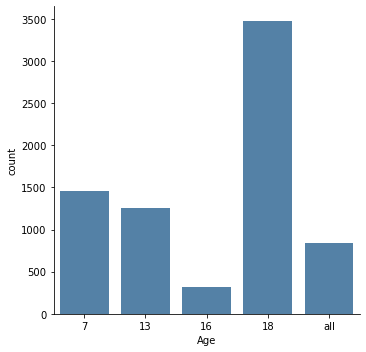

In [340]:
sns.catplot(x="Age", kind="count",color="#4682B4", data=data_age,order=order,ax=axs)


### Titulos com maiores notas no IMDb e no Rotten Tomatoes

In [392]:
data[data['IMDb'] == data['IMDb'].max()][['Title','Year','Directors','Genres']].head(5)

,Title,Year,Directors,Genres
1292,My Next Guest with David Letterman and Shah Ru...,2019,NaN,Talk-Show
5110,Love on a Leash,2011,Fen Tian,"Comedy,Drama,Fantasy,Romance"
6566,Square One,2019,Danny Wu,"Documentary,Drama,Music"
6837,Steven Banks: Home Entertainment Center,1989,Tom McLoughlin,Comedy
7220,"Down, But Not Out!",2015,Miguel Gaudêncio,"Documentary,Sport"


In [411]:
data[data['Rotten Tomatoes'] == data['Rotten Tomatoes'].max()][['Title','Year','Directors','Genres']].head(5)

,Title,Year,Directors,Genres
11,3 Idiots,2009,Rajkumar Hirani,"Comedy,Drama"
89,The Dawn Wall,2018,"Josh Lowell,Peter Mortimer","Documentary,Biography,Sport"
126,Bad Genius,2017,Nattawut Poonpiriya,"Comedy,Crime,Drama,Thriller"
141,Bill Burr: I'm Sorry You Feel That Way,2014,Jay Karas,Comedy
148,The Square,2013,Ruben Östlund,"Comedy,Drama"


### Idade dos Títulos por Plataforma

In [320]:
# Separação das Plataformas

data_prime = data[data['Prime Video'] == 1].iloc[:,[1,2,3,4,5,6,7,11,12,13,14,15,16]]
data_netflix = data[data['Netflix'] == 1].iloc[:,[1,2,3,4,5,6,8,11,12,13,14,15,16]]
data_hulu = data[data['Hulu'] == 1].iloc[:,[1,2,3,4,5,6,7,9,12,13,14,15,16]]
data_disney = data[data['Disney+'] == 1].iloc[:,[1,2,3,4,5,6,10,11,12,13,14,15,16]]

(0.0, 2700.0)

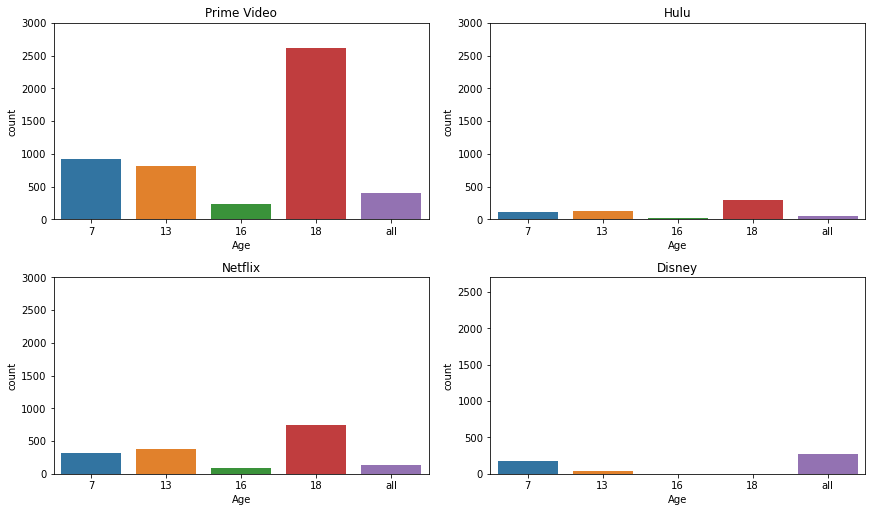

In [319]:
fig,axs = plt.subplots(nrows = 2,ncols = 2,figsize=(12,7),constrained_layout=True)

sns.countplot(x='Age',data=data_prime,ax=axs[0][0],order=order)
axs[0][0].set_title('Prime Video')
axs[0][0].set_ylim(0,3000)

sns.countplot(x='Age',data=data_hulu,ax=axs[0][1],order=order)
axs[0][1].set_title('Hulu')
axs[0][1].set_ylim(0,3000)

sns.countplot(x='Age',data=data_netflix,ax=axs[1][0],order=order)
axs[1][0].set_title('Netflix')
axs[1][0].set_ylim(0,3000)

sns.countplot(x='Age',data=data_disney,ax=axs[1][1],order=order)
axs[1][1].set_title('Disney')
axs[1][1].set_ylim(0,2700)



### Porcentagem de Filmes em cada plataforma

In [34]:
labels = 'Netflix','PrimeVideo', 'Hulu','Disney+'
values = {'Netflix':0,'Prime Video':0,'Hulu':0,'Disney+':0}

values['Netflix'] = len(data[data['Netflix'] == 1])
values['Prime Video'] = len(data[data['Prime Video'] == 1])
values['Hulu'] = len(data[data['Hulu'] == 1])
values['Disney+'] = len(data[data['Disney+'] == 1])

sizes = list(values.values())

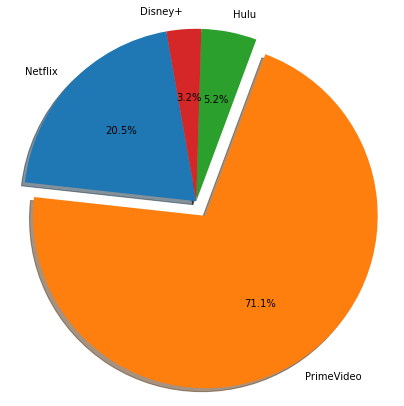

In [35]:
fig, axes = plt.subplots(figsize=(7,7))
explode = (0, 0.1, 0, 0)

axes.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=100)
axes.axis('equal')
plt.show()

# Ano de Lançamento dos Filmes por Plataforma

# Testes

In [322]:
dataYearPV = data[data['Prime Video'] == 1][['Year']]
dataYearPV = dataYearPV.rename(columns={'Year':"Prime Video"})

dataYearNet = data[data['Netflix'] == 1][['Year']]
dataYearNet = dataYearNet.rename(columns={'Year':"Netflix"})

dataYearHulu = data[data['Hulu'] == 1][['Year']]
dataYearHulu = dataYearHulu.rename(columns={'Year':"Hulu"})

dataYearD = data[data['Disney+'] == 1][['Year']]
dataYearD = dataYearD.rename(columns={'Year':"Disney"})

dataHist = pd.concat([dataYearPV,dataYearNet, dataYearHulu, dataYearD], axis=1)

In [323]:
dataHist

,Prime Video,Netflix,Hulu,Disney
0,NaN,2010.0,NaN,NaN
1,NaN,1999.0,NaN,NaN
2,NaN,2018.0,NaN,NaN
3,NaN,1985.0,NaN,NaN
4,1966.0,1966.0,NaN,NaN
...,...,...,...,...
16739,NaN,NaN,NaN,1980.0
16740,NaN,NaN,NaN,2001.0
16741,NaN,NaN,NaN,2013.0
16742,NaN,NaN,NaN,2017.0


## Histograma com subplot legal

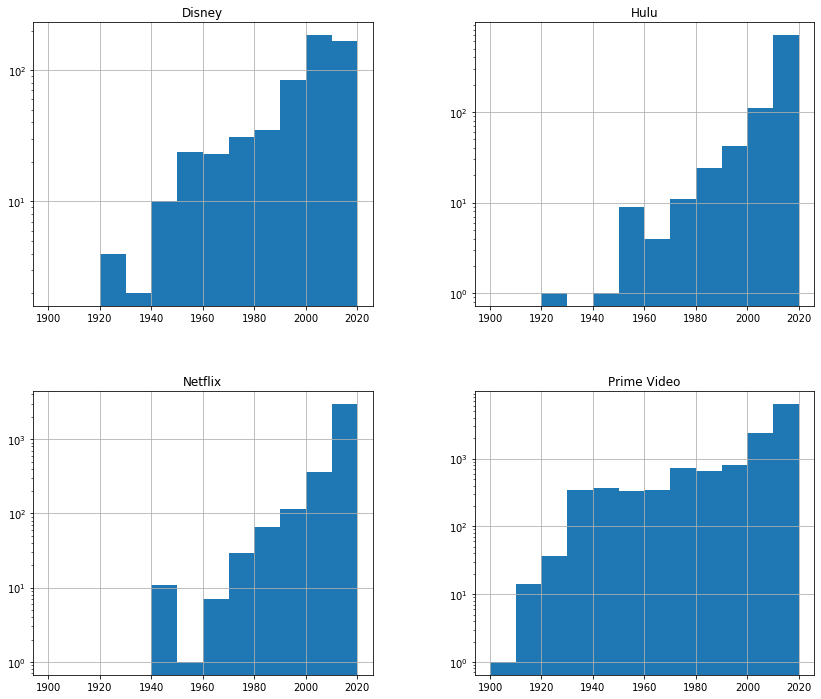

In [22]:
dataHist.hist(bins = 12, range = (1900,2020), figsize=(14, 12), log = True, label = ['ano', 'quantidade'])

# plt.xlabel("X-axis") 
# plt.ylabel("y-axis") 
plt.show()

## Histograma com subplot vertical

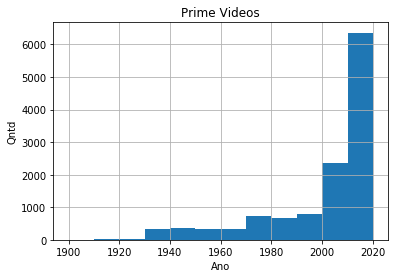

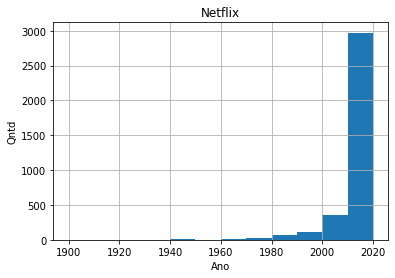

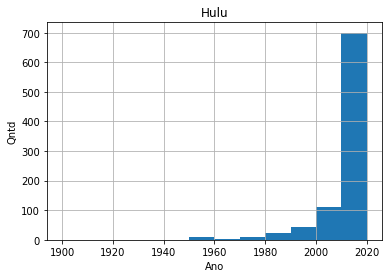

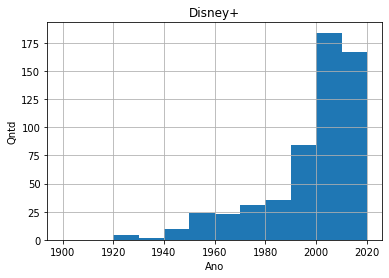

In [23]:
# plt.subplot(2, 2, 1)
dataYearPV.hist(bins = 12, range = (1900,2020))
plt.title('Prime Videos')
plt.xlabel('Ano')
plt.ylabel('Qntd')
plt.show()

# plt.subplot(2, 2, 2)
dataYearNet.hist(bins = 12, range = (1900,2020))
plt.title('Netflix')
plt.xlabel('Ano')
plt.ylabel('Qntd')
plt.show()

# plt.subplot(2, 2, 3)
dataYearHulu.hist(bins = 12, range = (1900,2020))
plt.title('Hulu')
plt.xlabel('Ano')
plt.ylabel('Qntd')
plt.show()

# plt.subplot(2, 2, 4)
dataYearD.hist(bins = 12, range = (1900,2020))
plt.title('Disney+')
plt.xlabel('Ano')
plt.ylabel('Qntd')
plt.show()